# Preprocessing

In [1]:
import os
import time
import torch
import sklearn
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.autograd import Variable

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29806,35,technician,married,university.degree,no,yes,no,cellular,apr,mon,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
40450,92,retired,married,unknown,no,no,yes,cellular,aug,tue,...,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
36028,31,technician,single,university.degree,no,no,no,cellular,may,tue,...,1,2,1,success,-1.8,92.893,-46.2,1.266,5099.1,no
6564,39,admin.,married,professional.course,no,yes,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
38559,69,retired,married,professional.course,no,no,yes,cellular,oct,thu,...,1,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
35965,29,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,no
24229,51,entrepreneur,married,university.degree,no,no,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
9996,36,technician,married,high.school,no,yes,no,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
21577,47,services,married,basic.4y,no,yes,yes,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
31060,33,management,married,university.degree,no,no,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no


In [4]:
df.shape

(41188, 21)

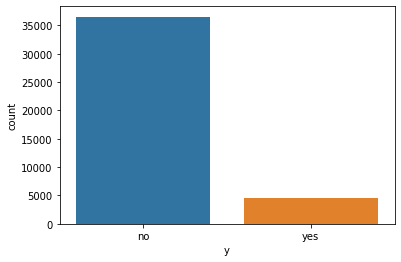

In [5]:
sns.countplot(x='y', data=df)
plt.show();

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Version 1

In [7]:
df2 = pd.get_dummies(df, columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
print(df2.shape)

(41188, 64)


In [8]:
df2['y'] = df2['y'].astype('category')

In [9]:
print(df2.dtypes)

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object


In [10]:
df2.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 64, dtype: int64

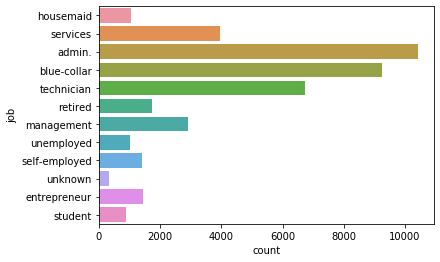

In [11]:
sns.countplot(y='job', data=df);

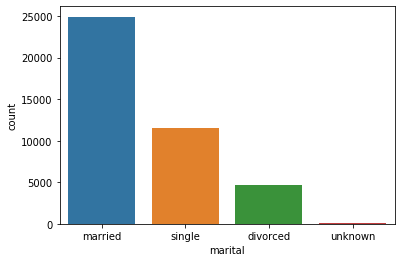

In [12]:
sns.countplot(x='marital', data=df);

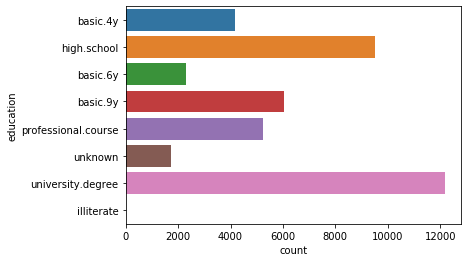

In [13]:
sns.countplot(y='education', data=df);

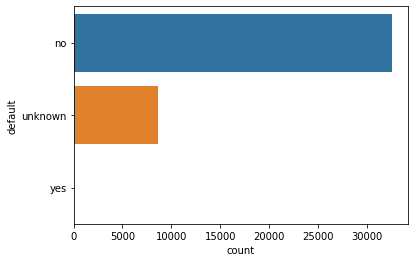

In [14]:
sns.countplot(y='default', data=df);

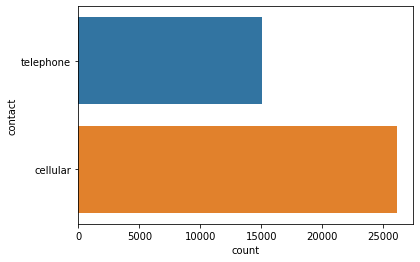

In [15]:
sns.countplot(y='contact', data=df);

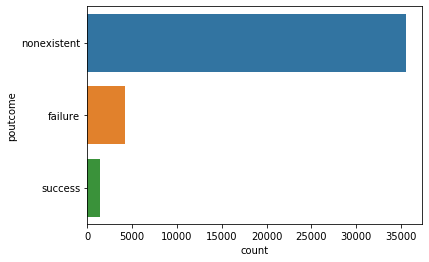

In [16]:
sns.countplot(y='poutcome', data=df);

## Version 2

In [17]:
df3 = df.copy()

In [18]:
df3.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
df3.job = le.fit_transform(df3.job)
df3.marital = le.fit_transform(df3.marital)
df3.education = le.fit_transform(df3.education)
df3.default = le.fit_transform(df3.default)
df3.housing = le.fit_transform(df3.housing)
df3.loan = le.fit_transform(df3.loan)
df3.contact = le.fit_transform(df3.contact)
df3.month = le.fit_transform(df3.month)
df3.day_of_week = le.fit_transform(df3.day_of_week)
df3.poutcome = le.fit_transform(df3.poutcome)

In [21]:
df3['y'] = df3.y.map(dict(yes=1, no=0))

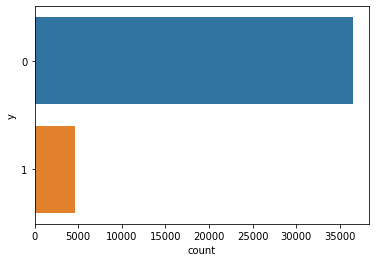

In [22]:
sns.countplot(y='y', data=df3);

In [23]:
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
X = df3.iloc[:,0:19]
y = df3.iloc[:,20]

# SKLEARN

In [25]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

list_optimzers = ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam']

In [26]:
x_train.shape, y_train.shape

((32950, 19), (32950,))

In [27]:
x_test.shape, y_test.shape

((8238, 19), (8238,))

In [28]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [31]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
32950/32950 [==============================] - 1s 19us/step - loss: 0.4102 - accuracy: 0.8630
Epoch 2/10
32950/32950 [==============================] - 1s 17us/step - loss: 0.2851 - accuracy: 0.9004
Epoch 3/10
32950/32950 [==============================] - 0s 12us/step - loss: 0.2688 - accuracy: 0.9013
Epoch 4/10
32950/32950 [==============================] - 1s 17us/step - loss: 0.2637 - accuracy: 0.9012
Epoch 5/10
32950/32950 [==============================] - 0s 13us/step - loss: 0.2620 - accuracy: 0.9013
Epoch 6/10
32950/32950 [==============================] - 0s 13us/step - loss: 0.2585 - accuracy: 0.9012
Epoch 7/10
32950/32950 [==============================] - 0s 13us/step - loss: 0.2575 - accuracy: 0.9012
Epoch 8/10
32950/32950 [==============================] - 0s 12us/step - loss: 0.2558 - accuracy: 0.9012
Epoch 9/10
32950/32950 [==============================] - 0s 12us/step - loss: 0.2529 - accuracy: 0.9014
Epoch 10/10
32950/32950 [==============================

In [32]:
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n final accuracy: %.2f%%" % (scores[1]*100))

8238/8238 [==============================] - 0s 26us/step

 final accuracy: 90.07%


# TORCH

In [33]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [43]:
x_train_torch = torch.tensor(x_train.values)
x_test_torch = torch.tensor(x_test.values)

y_train_torch = y_train.values
y_train_torch = y_train_torch.reshape(y_train_torch.shape[0], 1)
y_train_torch = torch.tensor(y_train_torch)

y_test_torch = y_test.values
y_test_torch = y_test_torch.reshape(y_test_torch.shape[0], 1)
y_test_torch = torch.tensor(y_test_torch)

In [44]:
x_train_t = torch.from_numpy(x_train.to_numpy()).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

x_test_t = torch.from_numpy(x_test.to_numpy()).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [45]:
print(x_train_t.shape, y_train_t.shape)
print(x_test_t.shape, y_test_t.shape)

torch.Size([32950, 19]) torch.Size([32950])
torch.Size([8238, 19]) torch.Size([8238])


In [46]:
y_train_torch.size()

torch.Size([32950, 1])

In [47]:
x_train_torch.size()

torch.Size([32950, 19])

In [34]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(19, 10)
        self.tanh1 = nn.Tanh()
        self.out = nn.Linear(10, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.tanh1(a1)
        a2 = self.out(h1)
        y = self.out_act(a2)
        y = a2
        return y

In [62]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001)
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [63]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [64]:
x_train_t = x_train_t.to(device)
y_train_t = y_train_t.to(device)
x_test_t = x_test_t.to(device)
y_test_t = y_test_t.to(device)

In [65]:
net = net.to(device)
criterion = criterion.to(device)

In [66]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == y_pred).sum().float() / len(y_true)

In [67]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

for epoch in range(1000):
    y_pred = net(x_train_t)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train_t)
    if epoch % 100 == 0:
        train_acc = calculate_accuracy(y_train_t, y_pred)
        y_test_pred = net(x_test_t)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test_t)
        test_acc = calculate_accuracy(y_test_t, y_test_pred)
        print(f'''epoch {epoch} Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)} 
        Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [68]:
def train_epoch(model, opt, criterion, batch_size=128):
    model.train()
    losses = []
    for beg_i in range(0, x_train_torch.size(0), batch_size):
        
        x_batch = x_train_torch[beg_i:beg_i + batch_size,:]
        y_batch = y_train_torch[beg_i:beg_i + batch_size,:]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch.float())
        # (2) Compute diff
        loss = criterion(y_hat, y_batch.float())
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
        
    return losses

In [69]:
e_losses = []
num_epochs = 10
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

RuntimeError: 1D target tensor expected, multi-target not supported

# Questions for group :
    
- why didnt we use the full version of the dataset ?
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html